# Commodity Price Forecasting Using Multi-Market Financial Time Series Data  

## Problem Statement  
Global commodity markets are influenced by multiple, interconnected factors including stock indices, futures contracts, and foreign exchange rates. Predicting commodity returns is particularly challenging due to market volatility, time-lagged effects, and dependencies across different financial instruments. Without reliable forecasts, traders, investors, and organizations may struggle to manage risks and optimize trading strategies effectively.

This project leverages historical data from multiple markets—including the London Metal Exchange (LME), Japan Exchange Group (JPX), and U.S. stock markets—to develop predictive models for commodity returns and spreads. By incorporating lagged features, the project captures the influence of past market movements on future commodity prices, enabling more informed and timely predictions.

## Success of the project will be evaluated using metrics such as:

Mean Absolute Error (MAE): Average magnitude of prediction errors.

Root Mean Squared Error (RMSE): Measures error magnitude with greater penalty for larger deviations.

R-squared (R²): Proportion of variance explained by the model.

Directional Accuracy: Percentage of correct predictions in the direction of price movement.

## Objectives  
1. To preprocess and integrate multi-market financial time series data for commodities.  
2. To explore and analyze patterns, correlations, and volatility in commodity returns.  
3. To develop predictive models for selected commodity prices and spreads.  
4. To evaluate model accuracy and stability using appropriate performance metrics.  
5. To generate insights that can support trading strategies and risk management.  

In [95]:
#importing the necessary libraries

# Core data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical analysis and time series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Utilities
import warnings
warnings.filterwarnings("ignore")
import datetime
from datetime import datetime, timedelta

# Configure settings for better visualization
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Display settings for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)



### Loading the Training Labels

We load the file train_labels.csv that our model will try to learn and predict.  

In [96]:
df_train_labels = pd.read_csv(r'C:\Users\Chumba\Desktop\CAPSTONE PROJECT\multi-asset-commodity-forecasting\Data\train_labels.csv')
df_train_labels

date_id  target_0  target_1  target_2  target_3  target_4  target_5  \
0           0  0.005948 -0.002851 -0.004675 -0.000639       NaN       NaN   
1           1  0.005783 -0.024118 -0.007052 -0.018955 -0.031852 -0.019452   
2           2  0.001048  0.023836 -0.008934 -0.022060       NaN       NaN   
3           3  0.001700 -0.024618  0.011943  0.004778       NaN       NaN   
4           4 -0.003272  0.005234  0.006856  0.013312  0.023953  0.010681   
...       ...       ...       ...       ...       ...       ...       ...   
1956     1956  0.002761 -0.004500 -0.001530 -0.003022       NaN       NaN   
1957     1957  0.011424 -0.001036  0.000409 -0.003524 -0.008052 -0.013435   
1958     1958 -0.002654 -0.002032  0.001083  0.004975  0.016810  0.020511   
1959     1959  0.002124 -0.006335 -0.003885  0.002704 -0.004042 -0.001637   
1960     1960 -0.005013  0.006502  0.004530  0.000608 -0.003953 -0.025734   

      target_6  target_7  target_8  target_9  target_10  target_11  target_12  \
0    -0.006729  0.006066       NaN  0.003446        NaN  -0.005674        NaN   
1     0.003002 -0.006876 -0.002042  0.021284   0.017698   0.004791   0.010499   
2     0.037449  0.007658       NaN -0.026844        NaN  -0.002100        NaN   
3    -0.012519 -0.016896       NaN  0.014843        NaN   0.004492        NaN   
4    -0.011649  0.002019  0.003897 -0.008985  -0.010695  -0.009609   0.000433   
...        ...       ...       ...       ...        ...        ...        ...   
1956 -0.006263  0.001251       NaN  0.002182        NaN  -0.006279        NaN   
1957  0.013214 -0.008121  0.005308 -0.006430   0.016660  -0.005408   0.015955   
1958 -0.003176 -0.002232  0.012985  0.007888  -0.025815   0.004920  -0.027671   
1959  0.000142 -0.010872 -0.002934  0.004181  -0.006940   0.014596  -0.002258   
1960  0.003007  0.001393 -0.010105 -0.002610   0.024787  -0.008585   0.016827   

      target_13  target_14  target_15  target_16  target_17  target_18  \
0      0.000306        NaN  -0.005366  -0.004691        NaN   0.004416   
1     -0.018310   0.013664   0.023292   0.007293  -0.008720  -0.021583   
2      0.029436        NaN   0.010725  -0.008480        NaN  -0.004744   
3     -0.032790        NaN   0.000497   0.017481        NaN  -0.013823   
4      0.015363  -0.007354  -0.019111  -0.000852   0.013883   0.020858   
...         ...        ...        ...        ...        ...        ...   
1956   0.001156        NaN  -0.002534   0.000537        NaN   0.001815   
1957   0.010189   0.009496   0.001507   0.008760   0.047217  -0.005019   
1958  -0.002560  -0.029576   0.002225   0.002712   0.026733   0.004168   
1959   0.002865  -0.008349   0.008030   0.011330  -0.003092   0.003415   
1960  -0.000430   0.027430  -0.002651  -0.002978   0.015097   0.006311   

      target_19  target_20  target_21  target_22  target_23  target_24  \
0           NaN   0.008382   0.006122        NaN  -0.000908        NaN   
1      0.008823  -0.003377  -0.020721  -0.022573   0.012265  -0.017070   
2           NaN   0.009616  -0.008239        NaN   0.001071        NaN   
3           NaN  -0.017004  -0.002941        NaN  -0.003079        NaN   
4      0.001300   0.001823   0.014236   0.022863  -0.020243   0.018963   
...         ...        ...        ...        ...        ...        ...   
1956        NaN   0.009094  -0.005888        NaN  -0.007235        NaN   
1957   0.008541  -0.004577  -0.001985   0.096012  -0.000141   0.010182   
1958  -0.022580  -0.008972   0.004110   0.050006   0.004509   0.049787   
1959  -0.004691  -0.003353   0.019311   0.012614   0.009731  -0.002436   
1960  -0.003155  -0.005176  -0.000942  -0.012808  -0.002367  -0.043893   

      target_25  target_26  target_27  target_28  target_29  target_30  \
0      0.000863   0.001459   0.001350  -0.013582  -0.005273   0.000193   
1     -0.026115   0.011370  -0.000112   0.000741   0.028171  -0.003402   
2     -0.012131  -0.006961   0.000797  -0.004581   0.011770   0.033271   
3     -0.011266   0.003202   0.012

- Each row represents one trading day identified by `date_id`.  
- Each column (`target_0` … `target_423`) represents a **log return** for a specific financial instrument or a spread between two instruments.  
- These are the values the model will use as **labels** during  learning. 

## Data Inspection

###  Inspecting `train_labels.csv`

To understand the basic structure and characteristics of our dataset.  
We will start by inspecting its shape, column information, and summary statistics.

In [97]:
# Checking the shape of the df_train_labels
print("Shape of dataset:", df_train_labels.shape)

# Check data types and missing values
print("\nInfo:")
print(df_train_labels.info())

# Summary statistics
print("\nSummary statistics:")
print(df_train_labels.describe().T) 


Shape of dataset: (1961, 425)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Columns: 425 entries, date_id to target_423
dtypes: float64(424), int64(1)
memory usage: 6.4 MB
None

Summary statistics:
             count        mean         std       min         25%         50%  \
date_id     1961.0  980.000000  566.236258  0.000000  490.000000  980.000000   
target_0    1827.0    0.000470    0.011925 -0.123763   -0.004567    0.000928   
target_1    1784.0   -0.000575    0.016930 -0.120442   -0.010452   -0.000954   
target_2    1875.0    0.000215    0.013071 -0.067288   -0.007658    0.000318   
target_3    1875.0    0.000198    0.014901 -0.072471   -0.008839    0.000216   
...            ...         ...         ...       ...         ...         ...   
target_419  1859.0   -0.000818    0.025905 -0.148810   -0.015311    0.000082   
target_420  1617.0    0.001186    0.028414 -0.129016   -0.014564    0.000642   
target_421  1768.0    0.001295    0.032321 -0.1

### Dataset Shape
The dataset contains **1961 rows** and **425 columns**.  
- The `date_id` column represents the time index.  

### Dataset Info
The dataset consists of:  
- `date_id`: an integer index running from 0 to 1960.  
- 424 `target_*` columns: numerical values (float64), many of which contain missing values (`NaN`).  

### Summary Statistics
- Most `target_*` values have **means close to 0**.  
- Standard deviations are small (0.01 – 0.05), though some series show higher volatility.  
- Minimum and maximum values confirm fluctuations both above and below zero, consistent with time series return-like behavior.  
- Many targets have fewer than 1961 valid entries which highlighting the presence of missing values.  

### Missing Values Analysis

In [98]:
# Count missing values per column
missing_counts = df_train_labels.isna().sum().sort_values(ascending=False)
print(missing_counts.head(10))  

# Percentage of missing values overall
print("\nTotal missing percentage:", df_train_labels.isna().mean().mean() * 100, "%")


target_404    370
target_82     359
target_270    350
target_285    350
target_247    350
target_252    350
target_303    350
target_256    350
target_317    350
target_290    350
dtype: int64

Total missing percentage: 10.487206407295195 %


### Missing Value Analysis of df_train_labels

- **Total missing percentage**: **10.49%** of the dataset.  
- This indicates that while most values are present, a non-trivial portion of the data is incomplete.

This step counts the number of missing values per column in the dataset df_train_labels.
By sorting in descending order, we can quickly identify which columns are most affected by missing data.

In [99]:
# Count missing values per column
missing_cols = df_train_labels.isnull().sum()
missing_cols = missing_cols[missing_cols > 0].sort_values(ascending=False)
missing_cols


target_404    370
target_82     359
target_317    350
target_269    350
target_252    350
             ... 
target_84      86
target_86      86
target_87      86
target_89      86
target_69      86
Length: 422, dtype: int64

The results show:

**422 columns** contain missing values.

The column with the highest missing count is target_404 with 370 missing entries.

Other columns such as target_82, target_317, target_290, and target_303 also have 350 missing values.

On the lower end, some columns like target_39, target_45, target_43, target_56, and target_60 have 86 missing entries.

This confirms that missingness is spread across many columns, with varying severity.

Missing Value Analysis in Percentage per Column

While counts show the absolute missing values, percentages give a clearer idea of how much data is missing relative to the dataset size.
This helps prioritize which columns may need imputation, removal, or special treatment.

In [100]:
# Percentage of missing values per column
missing_percentage = (df_train_labels.isnull().sum() / len(df_train_labels)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
missing_percentage


target_404    18.867925
target_82     18.306986
target_317    17.848037
target_269    17.848037
target_252    17.848037
                ...    
target_84      4.385518
target_86      4.385518
target_87      4.385518
target_89      4.385518
target_69      4.385518
Length: 422, dtype: float64

## Missing Value Analysis in Percentage per Column
The percentage of missing values across columns shows:

- The column with the **highest missing percentage** is **`target_404` with ~18.87% missing values**.  
- Other heavily affected columns include **`target_82` (~18.31%), `target_317`, `target_290`, and `target_303`** —all with 17.85% missing values.  
- On the lower end, some columns such as **`target_39`, `target_45`, `target_43`, `target_56`, and `target_60`** have **4.39% missing values**.  
- In total, **422 columns** have missing data, but the severity varies from **~4% to ~19%**.  

- The missingness is widespread as none exceed 20%. 

###  Inspecting `train.csv`

So far, we have carefully inspected **`train_labels.csv`**, which contains the **target variables** (log returns and spreads).  

We explored:
- The **shape** of the dataset.  
- **Summary statistics** of all columns.  
- The **missing values**, noting that ~10% of the values are missing across 422 target columns.  

At this stage, we decided against dropping or imputing missing values in `train_labels.csv` yet.  
This is because:
1. The labels are only meaningful when aligned with the **input features** from `train.csv`.  
2. Some missing values may naturally correspond to days when certain securities were not traded, which will become clearer after inspecting the features dataset.  
3. Premature cleaning could cause us to drop valuable rows or columns that might still be usable after merging datasets.  

We now proceed to inspect **`train.csv`**,   
This inspection will include:
- Dataset **shape** and structure.  
- Column data types and non-null counts.  
- Summary statistics.  
- Missing values analysis.  

By comparing both `train.csv` and `train_labels.csv`, we will later decide:  
- How to properly merge them.  
- How to handle missing values across both datasets consistently.  
- Which features will be most useful for predicting the targets.  

In [101]:
df_train = pd.read_csv(r'C:\Users\Chumba\Desktop\CAPSTONE PROJECT\multi-asset-commodity-forecasting\Data\train.csv')
df_train

date_id  LME_AH_Close  LME_CA_Close  LME_PB_Close  LME_ZS_Close  \
0           0        2264.5        7205.0        2570.0        3349.0   
1           1        2228.0        7147.0        2579.0        3327.0   
2           2        2250.0        7188.5        2587.0        3362.0   
3           3        2202.5        7121.0        2540.0        3354.0   
4           4        2175.0        7125.0        2604.0        3386.0   
...       ...           ...           ...           ...           ...   
1956     1956        2629.5        9778.5        2010.0        2818.5   
1957     1957        2646.5        9860.0        2014.5        2838.5   
1958     1958        2658.5        9919.5        2011.0        2860.0   
1959     1959        2651.0        9930.5        2032.0        2862.0   
1960     1960        2647.0        9877.0        2022.5        2843.5   

      JPX_Gold_Mini_Futures_Open  JPX_Gold_Rolling-Spot_Futures_Open  \
0                            NaN                                 NaN   
1                            NaN                                 NaN   
2                         4684.0                              4691.0   
3                         4728.0                              4737.0   
4                            NaN                                 NaN   
...                          ...                                 ...   
1956                     16041.0                             16183.0   
1957                         NaN                                 NaN   
1958                     16132.5                             16261.0   
1959                     16214.5                             16341.0   
1960                     16270.0                             16400.0   

      JPX_Gold_Standard_Futures_Open  JPX_Platinum_Mini_Futures_Open  \
0                                NaN                             NaN   
1                                NaN                             NaN   
2                             4684.0                          3363.0   
3                             4729.0                          3430.0   
4                                NaN                             NaN   
...                              ...                             ...   
1956                         16046.0                          6076.0   
1957                             NaN                             NaN   
1958                         16134.0                          6200.0   
1959                         16211.0                          6175.0   
1960                         16277.0                          6272.5   

      JPX_Platinum_Standard_Futures_Open  JPX_RSS3_Rubber_Futures_Open  \
0                                    NaN                           NaN   
1                                    NaN                           NaN   
2                                 3367.0                         207.0   
3                                 3426.0                         207.0   
4                                    NaN                           NaN   
...                                  ...                           ...   
1956                              6073.0                         325.4   
1957                                 NaN                           NaN   
1958                              6200.0                         330.0   
1959                              6195.0                         330.0   
1960                              6280.0                         328.8   

      JPX_Gold_Mini_Futures_High  JPX_Gold_Rolling-Spot_Futures_High  \
0                            NaN                                 NaN   
1                            NaN                                 NaN   
2                         4735.0                              4746.0   
3                         4795.0                              4797.0   
4                            NaN                                 NaN   
...                          ...                                 ...   
1956  

## Initial Inspection of `train.csv`

After loading the `train.csv`, we observe that:

- **Shape of dataset**: `1961 rows × 558 columns`.  

- **Missing values**:  
  - From the preview, certain instruments `JPX_Gold_Mini_Futures_Open` contain `NaN` for some dates.  

### Initial Inspection of df_train 

This step will help us:

- Understand the shape of df_train.
- Identify numerical columns and their distributions.
- Detect potential missing values .

In [102]:
### Inspecting df_train

# Shape
print("Shape of dataset:", df_train.shape)

# Info
print("\nInfo:")
print(df_train.info())

# Summary statistics
print("\nSummary statistics:")
print(df_train.describe())


Shape of dataset: (1961, 558)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Columns: 558 entries, date_id to FX_ZARGBP
dtypes: float64(557), int64(1)
memory usage: 8.3 MB
None

Summary statistics:
           date_id  LME_AH_Close  LME_CA_Close  LME_PB_Close  LME_ZS_Close  \
count  1961.000000   1910.000000   1910.000000   1910.000000   1910.000000   
mean    980.000000   2252.202853   7928.229026   2085.848576   2795.022628   
std     566.236258    398.544566   1523.186335    183.154551    445.009643   
min       0.000000   1462.000000   4630.000000   1585.500000   1815.500000   
25%     490.000000   1925.250000   6396.125000   1973.000000   2479.500000   
50%     980.000000   2245.500000   8260.750000   2070.750000   2771.000000   
75%    1470.000000   2512.000000   9323.375000   2188.000000   3031.000000   
max    1960.000000   3849.000000  10889.000000   2681.000000   4498.500000   

       JPX_Gold_Mini_Futures_Open  JPX_Gold_Rolling-Spot_Futures_

### Summary of df_train Inspection

- The dataset has **1961 rows × 558 columns**, representing 558 features for each date_id.
- All columns except `date_id` are numerical.
- Statistical summary shows a wide range of values across features, which may require scaling or normalization in later preprocessing.

### Missing Value Analysis of df_train

To understand the missing data in df_train we check for missing values per column in order for it.  

Allow us to:

- Identify features with missing entries.
- Determine if any columns require imputation or removal.
- Compare missingness patterns with the train_labels.csv.

In [103]:
# Count missing values per column
missing_train = df_train.isnull().sum()
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)

# Display top 10 columns with most missing values
missing_train.head(10)


US_Stock_GOLD_adj_volume                  1713
US_Stock_GOLD_adj_low                     1713
US_Stock_GOLD_adj_high                    1713
US_Stock_GOLD_adj_close                   1713
US_Stock_GOLD_adj_open                    1713
JPX_Gold_Mini_Futures_settlement_price     116
JPX_RSS3_Rubber_Futures_Close              116
JPX_Gold_Mini_Futures_Volume               116
JPX_Gold_Rolling-Spot_Futures_Volume       116
JPX_Gold_Standard_Futures_Volume           116
dtype: int64

### Summary of Missing Values in df_train

- The `df_train` contains **558 columns** in total. 

- The missingness is more severe in US stock gold-related columns.  
- The other commodity features have fewer missing values.  

This analysis helps us prioritize which columns may need imputation or further investigation before merging with the target dataset.


In [104]:
# Percentage of missing values per column for df_train
missing_percentage_train = (df_train.isnull().sum() / len(df_train)) * 100
missing_percentage_train = missing_percentage_train[missing_percentage_train > 0].sort_values(ascending=False)
missing_percentage_train


US_Stock_GOLD_adj_volume    87.353391
US_Stock_GOLD_adj_low       87.353391
US_Stock_GOLD_adj_high      87.353391
US_Stock_GOLD_adj_close     87.353391
US_Stock_GOLD_adj_open      87.353391
                              ...    
US_Stock_PAAS_adj_high       3.416624
LME_CA_Close                 2.600714
LME_ZS_Close                 2.600714
LME_PB_Close                 2.600714
LME_AH_Close                 2.600714
Length: 519, dtype: float64

### Missing Value Analysis of df_train

- **Total columns with missing values**: 519 out of 558 columns.  

- The columns with the highest missing percentage are related to US Stock data, `US_Stock_GOLD_adj_high`, `US_Stock_GOLD_adj_open`, `US_Stock_GOLD_adj_volume`, `US_Stock_GOLD_adj_low`, and `US_Stock_GOLD_adj_close`, each with **87.35% missing values**.  
- Other columns, mainly LME and some commodity prices like `LME_ZS_Close`, `LME_PB_Close`, `LME_CA_Close`, and `LME_AH_Close`, have smaller but still significant missing values, around **2.6%**. 

- Missingness in this dataset is widespread, affecting both stock/commodity prices and futures data. Some columns are almost entirely missing especially certain US stock features, while others have minor gaps.  

This confirms that a **systematic approach to handle missing data** will be required before any analysis or modeling.


### Inspecting `target_pairs.csv`

The `target_pairs.csv` file shows how each target variable is linked to its corresponding features.  

Unlike the other two datasets, this one is mostly categorical, so instead we will be looking at completeness and consistency.  
  
- Making sure every target from `df_train_labels` is included in the mapping.  
- Verifying that all features mentioned in the mapping actually exist in `df_train`.  
- Spotting any missing or unmatched pairs that could cause problems later during merging or feature engineering.  

By carefully inspecting this mapping, we make sure that when we eventually **merge datasets or fill in missing values**, the relationships between targets and features are clear and accurate.

In [105]:
df_pairs = pd.read_csv(r'C:\Users\Chumba\Desktop\CAPSTONE PROJECT\multi-asset-commodity-forecasting\Data\target_pairs.csv')
df_pairs

target  lag                                               pair
0      target_0    1                              US_Stock_VT_adj_close
1      target_1    1               LME_PB_Close - US_Stock_VT_adj_close
2      target_2    1                        LME_CA_Close - LME_ZS_Close
3      target_3    1                        LME_AH_Close - LME_ZS_Close
4      target_4    1     LME_AH_Close - JPX_Gold_Standard_Futures_Close
..          ...  ...                                                ...
419  target_419    4                           FX_NOKUSD - LME_AH_Close
420  target_420    4  JPX_Gold_Standard_Futures_Close - US_Stock_RY_...
421  target_421    4              US_Stock_EWT_adj_close - LME_AH_Close
422  target_422    4    JPX_Platinum_Standard_Futures_Close - FX_NOKCHF
423  target_423    4              LME_CA_Close - US_Stock_CCJ_adj_close

[424 rows x 3 columns]

### Loading of `target_pairs`

We have **424 rows and 3 columns** in this dataset:  

- **`target`**: The target variable from `df_train_labels`.  
- **`lag`**: The time lag to apply when relating features to the target.  
- **`pair`**: The corresponding feature from `df_train` that are linked to each target. 

Key observations:  
- Each target has at least one paired feature, ensuring we know which columns in `df_train` will influence which targets.  
- The dataset is mainly **categorical**, so our focus is **validating completeness and consistency** rather than calculating numeric statistics.  
- This mapping will guide **merging, lagging, and feature engineering** steps in subsequent preprocessing. 

### Checking if all target columns are in df_pairs

Before merging or using the `target_pairs.csv` file, we need to ensure that every target column in `df_train_labels` has a corresponding entry in the mapping.  
This ensures that we won't lose any target information when linking features later.


In [106]:
# Checking if all targets in df_train_labels are in df_pairs
missing_targets = set(df_train_labels.columns) - set(df_pairs['target'])
missing_targets


{'date_id'}

- All target columns from `df_train_labels` are present in the mapping. 

### Verifying all features referenced in the mapping exist in the main dataset

We also need to confirm that all features listed in the `pair` column of `df_pairs` exist in `df_train`.  
This ensures we can successfully join features to targets without encountering missing columns later.


In [107]:
# Extracting unique features from df_pairs
features = set()
for p in df_pairs['pair']:
    split_features = [f.strip() for f in p.split('-')]
    features.update(split_features)

# Check which features are missing in df_train
missing_features = features - set(df_train.columns)
missing_features


set()

- The output is `set()`, an empty set, which confirms that **all target columns in `df_train_labels` are present in the `df_pairs` mapping**.  

In [108]:
# Extract unique features mentioned in the pairs column
features_in_pairs = set()
for item in df_pairs['pair']:
    parts = item.split(' - ')
    for part in parts:
        features_in_pairs.add(part.strip())

# Check which features are missing in df_train
missing_features = features_in_pairs - set(df_train.columns)
missing_features


set()

- All target columns from `df_train_labels` are present in the `target_pairs.csv`.
- All features referenced in `df_pairs` exist in the `train.csv`.
- There are no missing or unmatched targets/features.

### Missing Value Check for `df_pairs`

The `df_pairs` dataset defines the mapping between each target variable and its corresponding feature(s).  
Before merging or using these mappings, it's important to confirm that there are no missing values in any of its columns.

In [109]:
# Check for missing values in df_pairs
missing_pairs = df_pairs.isnull().sum()
missing_pairs


target    0
lag       0
pair      0
dtype: int64

All columns (`target`, `lag`, `pair`) in `df_pairs` have **0 missing values**, indicating that the mapping is complete and ready to use.

## Data Cleaning and Preprocessing

Now that we have inspected all three datasets and validated the target-feature mappings, we move into the **data cleaning and preprocessing** phase.
What we intend to cover in this part is,

- **Handle missing values**: Impute or drop missing entries in both train and train_labels datasets.
- **Ensure data consistency**: Confirm that numeric columns have valid types and no unexpected anomalies remain.
- **Prepare data for merging**: Align targets with their corresponding features using `df_pairs` so that feature engineering and modeling can proceed smoothly.

### Cleaning `df_train_labels`

We have some missing values in the target column ranging from 4–19%.  
Since targets are what we want to predict, we will not impute them as this could potentially bias our model hence we will drop all rows with missing values this will ensure we train only on reliable data.  

In [110]:
# Drop rows in df_train_labels that have any missing target values
df_train_labels_clean = df_train_labels.dropna()

df_train_labels_clean.shape


(1133, 425)

The dataset `df_train_labels_clean` now has all rows with missing target values removed.  
This ensures that our model will be trained only on complete and reliable target data.  

### Cleaning `df_train`

Some feature columns have very high missing percentages, for example `US_Stock_GOLD_*` with ~87% missing. These columns are too sparse to be useful for modeling hence we drop the columns with more than 50% of missing values.  

In [111]:
# Calculate missing percentage per column
missing_percentage_train = df_train.isnull().mean() * 100

# Drop columns with more than 50% missing
df_train_clean = df_train.drop(columns=missing_percentage_train[missing_percentage_train > 50].index)

df_train_clean.shape


(1961, 553)

Columns with more than 50% missing values have been dropped from `df_train`.  
The remaining features are more complete and suitable for **forward/backward fill imputation**.

### Imputing Missing Feature Values

For the remaining feature columns with missing values (~2–10%), we will use **forward-fill followed by backward-fill**.  
This is appropriate for time-series as it enables impute missing values with either the previous or next value which reasonably fills in the missing values.


In [112]:
# Sorting by date for proper time order
df_train_clean = df_train_clean.sort_values('date_id')

# Imputing with Forward-fill
df_train_clean = df_train_clean.fillna(method='ffill').fillna(method='bfill')

# Confirm no missing values remain
print("Missing values after safe imputation:", df_train_clean.isnull().sum().sum())



Missing values after safe imputation: 0


All remaining missing values in `df_train` have been imputed using **forward-fill and backward-fill**.  
The dataset is now complete and ready for **merging with targets and further processing**.

In [113]:
# Verify no missing values in the cleaned datasets

datasets_clean = {
    "df_train_labels_clean": df_train_labels_clean,
    "df_train_clean": df_train_clean,
    "df_pairs": df_pairs  
}

for name, df in datasets_clean.items():
    missing_count = df.isnull().sum().sum()
    if missing_count == 0:
        print(f"{name}: No missing values")
    else:
        print(f"{name}: Missing values detected - Total: {missing_count}")


df_train_labels_clean: No missing values
df_train_clean: No missing values
df_pairs: No missing values


### Verification of Missing Values Across All Datasets

This step confirms that after cleaning and imputation all our datasets have no missing values.

### Checking for Duplicates and Data Types

After imputing missing values, we check for duplicates and data types to ensure that our datasets are fully clean and ready for analysis.  
This step confirms that our datasets are well-prepared and free of structural issues before moving to EDA and feature engineering.



In [114]:
# Checking for duplicate rows in each dataset
print("Duplicates in df_train_labels:", df_train_labels.duplicated().sum())
print("Duplicates in df_train:", df_train.duplicated().sum())
print("Duplicates in df_pairs:", df_pairs.duplicated().sum())

# Checking data types for each dataset
print("\nData types for df_train_labels:\n", df_train_labels.dtypes.value_counts())
print("\nData types for df_train:\n", df_train.dtypes.value_counts())
print("\nData types for df_pairs:\n", df_pairs.dtypes.value_counts())


Duplicates in df_train_labels: 0
Duplicates in df_train: 0
Duplicates in df_pairs: 0

Data types for df_train_labels:
 float64    424
int64        1
Name: count, dtype: int64

Data types for df_train:
 float64    557
int64        1
Name: count, dtype: int64

Data types for df_pairs:
 object    2
int64     1
Name: count, dtype: int64


### Checking for Duplicates and Data Types
The duplicate check confirmed there are no repeated entries in our dataset and the data type check verifyied we had appropriate data types ready for analysis and modeling.

### Verifying Time Ordering

We will be confirming that the  df_train,  `date_id` is sequential. This ensures that **forward/backward filling** and other **time-based operations** preserve chronological order.  

In [115]:
# Check if date_id is monotonically increasing

is_time_ordered = df_train['date_id'].is_monotonic_increasing
print("Is the 'date_id' column time-ordered?", is_time_ordered)


Is the 'date_id' column time-ordered? True


### Veryfing Time Order Analysis 

- The date_id column is confirmed to be monotonically increasing which then means that all time-based operations can be applied without reordering the dataset. 

### Selecting Subsets for Modeling

We will create subsets of features (X) and targets (Y) for our capstone project.
1. **Targets (Y subset):** Top 20 targets based on variance from `df_train_labels_clean`.
2. **Features (X subset):** Features relevant to these targets based on `df_pairs`.


In [116]:

# Compute variance of all target columns
target_variance = df_train_labels_clean.var().sort_values(ascending=False)

# Select top targets by variance
selected_targets = target_variance.head(20).index.tolist()

# Ensure all selected targets exist in the cleaned labels dataset
selected_targets = [t for t in selected_targets if t in df_train_labels_clean.columns]
print("Selected targets (Y subset):", selected_targets)

# Map features for these targets using df_pairs
relevant_pairs = df_pairs[df_pairs['target'].isin(selected_targets)]

# Extract all unique features from the pairs
relevant_features = set()
for pair in relevant_pairs['pair']:
    parts = [f.strip() for f in pair.split('-')]
    relevant_features.update(parts)

# Ensure all relevant features exist in the cleaned train dataset
relevant_features = [f for f in relevant_features if f in df_train_clean.columns]
print("Number of features in X subset:", len(relevant_features))

# X subset
df_X_subset = df_train_clean[relevant_features]
print("X subset shape:", df_X_subset.shape)
df_X_subset

# Y subset
df_Y_subset = df_train_labels_clean[selected_targets]
print("Y subset shape:", df_Y_subset.shape)
df_Y_subset




Selected targets (Y subset): ['date_id', 'target_411', 'target_335', 'target_352', 'target_393', 'target_329', 'target_357', 'target_404', 'target_343', 'target_224', 'target_235', 'target_247', 'target_396', 'target_267', 'target_276', 'target_244', 'target_325', 'target_394', 'target_241', 'target_361']
Number of features in X subset: 18
X subset shape: (1961, 18)
Y subset shape: (1133, 20)


date_id  target_411  target_335  target_352  target_393  target_329  \
9           9    0.039482    0.006329    0.032286   -0.054947   -0.005356   
10         10    0.028288    0.012384    0.036262   -0.037801    0.021152   
11         11   -0.016702   -0.008432    0.017974    0.040442    0.004623   
12         12   -0.008968   -0.028177    0.001947   -0.042832    0.076376   
13         13    0.002587   -0.022405   -0.008216   -0.029820    0.081258   
...       ...         ...         ...         ...         ...         ...   
1924     1924   -0.065663    0.043284    0.084731   -0.075741    0.109262   
1925     1925   -0.036732    0.011206    0.055508   -0.072659    0.118634   
1926     1926   -0.077684    0.086405    0.092405   -0.043980    0.109353   
1927     1927   -0.044389    0.043349    0.037326   -0.039876    0.079621   
1928     1928   -0.028049   -0.002940    0.022932   -0.012172   -0.065727   

      target_357  target_404  target_343  target_224  target_235  target_247  \
9      -0.075943   -0.022941    0.032416   -0.010350    0.008282    0.034871   
10     -0.059478   -0.017637    0.011430   -0.002606    0.021750    0.043300   
11     -0.036574   -0.025990    0.011317    0.031715   -0.011196   -0.007357   
12     -0.026387   -0.032487    0.010341    0.012834   -0.006246   -0.051804   
13      0.032679   -0.038975   -0.040002   -0.007967    0.012002   -0.011642   
...          ...         ...         ...         ...         ...         ...   
1924   -0.118586   -0.005103    0.104818    0.048499    0.114682    0.059820   
1925   -0.077587   -0.004896    0.070116    0.032042    0.062099    0.021263   
1926   -0.109251    0.042120    0.089709    0.024704   -0.019467   -0.030296   
1927   -0.051772    0.005888    0.040609    0.052031   -0.038398   -0.046423   
1928   -0.041956   -0.014200    0.019623    0.011664   -0.048982   -0.071935   

      target_396  target_267  target_276  target_244  target_325  target_394  \
9       0.008841   -0.021913    0.017092   -0.020040    0.145477    0.031133   
10     -0.000889    0.037520    0.026429    0.002792    0.140073    0.037628   
11     -0.039248    0.006817   -0.019620    0.030863    0.059475    0.014436   
12     -0.028604    0.030053   -0.026558    0.015442    0.001613   -0.007384   
13     -0.013740    0.057882    0.034605   -0.014548   -0.018080   -0.024782   
...          ...         ...         ...         ...         ...         ...   
1924   -0.005823   -0.116009    0.048897    0.061437   -0.099409    0.095280   
1925    0.015658    0.056910    0.032163    0.060793   -0.034283    0.057452   
1926   -0.022272    0.095668    0.049536    0.045153    0.021197    0.073012   
1927    0.003142    0.116237    0.039797    0.050320    0.058318    0.023194   
1928    0.032569    0.007379    0.038538    0.001345    0.074147    0.010305   

      target_241  target_361  
9      -0.007824    0.048270  
10      0.004822    0.068163  
11     -0.047909    0.016076  
12     -0.015622    0.020878  
13     -0.014275   -0.018910  
...          ...         ...  
1924   -0.015664   -0.000377  
1925   -0.006150    0.024735  
1926   -0.020005    0.012064  
1927    0.020560    0.007835  
1928   -0.019610   -0.000167  

[1133 rows x 20 columns]

## Subset Summary

**Selected targets (Y subset):**  
['date_id', 'target_411', 'target_393', 'target_329', 'target_335', 'target_404', 'target_352', 'target_343', 'target_357', 'target_235', 'target_224', 'target_267', 'target_247', 'target_276', 'target_325', 'target_241', 'target_244', 'target_396', 'target_394', 'target_361']

**Features in X subset (18 features):**  
['LME_ZS_Close', 'US_Stock_OKE_adj_close', 'US_Stock_TECK_adj_close', 'US_Stock_TRGP_adj_close', 'US_Stock_CLF_adj_close', 'US_Stock_HAL_adj_close', 'US_Stock_X_adj_close', 'LME_AH_Close', 'LME_CA_Close', 'JPX_Gold_Standard_Futures_Close', 'US_Stock_OXY_adj_close', 'US_Stock_CVE_adj_close', 'JPX_Platinum_Standard_Futures_Close', 'US_Stock_HL_adj_close', 'LME_PB_Close', 'US_Stock_ALB_adj_close', 'US_Stock_DVN_adj_close', 'US_Stock_OIH_adj_close']

**Number of features in X subset:** 18  

**Shape of X subset:** (1961, 18)  
**Shape of Y subset:** (1133, 20)  

- `df_X_subset` contains features mapped to the top 20 targets.  
- `df_Y_subset` contains the top 20 targets to focus on for modeling.  
- X and Y subset row mismatch (1961 vs 1133) needs alignment before modeling.

 Before modeling, we map the selected Y targets to their corresponding instruments from the `df_pairs` dataset. This helps us interpret what each target actually represents,           ensuring clarity .

In [117]:
# Selected targets 
selected_targets = [
    'target_411', 'target_393', 'target_329', 'target_335', 'target_404',
    'target_352', 'target_343', 'target_357', 'target_235', 'target_224',
    'target_267', 'target_247', 'target_276', 'target_325', 'target_241',
    'target_244', 'target_396', 'target_394', 'target_361'
]

df_target_map = (
    df_pairs[df_pairs['target'].isin(selected_targets)]
    .drop_duplicates(subset=['target'])
    .copy()
)

mapping = pd.DataFrame({"target_column": selected_targets})
mapping = mapping.merge(
    df_target_map[['target', 'lag', 'pair']],  
    left_on="target_column", 
    right_on="target", 
    how="left"
)
mapping


target_column      target  lag  \
0     target_411  target_411    4   
1     target_393  target_393    4   
2     target_329  target_329    4   
3     target_335  target_335    4   
4     target_404  target_404    4   
5     target_352  target_352    4   
6     target_343  target_343    4   
7     target_357  target_357    4   
8     target_235  target_235    3   
9     target_224  target_224    3   
10    target_267  target_267    3   
11    target_247  target_247    3   
12    target_276  target_276    3   
13    target_325  target_325    4   
14    target_241  target_241    3   
15    target_244  target_244    3   
16    target_396  target_396    4   
17    target_394  target_394    4   
18    target_361  target_361    4   

                                                 pair  
0               LME_AH_Close - US_Stock_CVE_adj_close  
1                US_Stock_HL_adj_close - LME_AH_Close  
2   JPX_Platinum_Standard_Futures_Close - US_Stock...  
3              US_Stock_TRGP_adj_close - LME_CA_Close  
4   JPX_Gold_Standard_Futures_Close - US_Stock_X_a...  
5               US_Stock_OXY_adj_close - LME_CA_Close  
6               US_Stock_DVN_adj_close - LME_ZS_Close  
7               LME_ZS_Close - US_Stock_HAL_adj_close  
8   JPX_Platinum_Standard_Futures_Close - US_Stock...  
9               US_Stock_OXY_adj_close - LME_AH_Close  
10              LME_AH_Close - US_Stock_CLF_adj_close  
11  JPX_Platinum_Standard_Futures_Close - US_Stock...  
12  JPX_Gold_Standard_Futures_Close - US_Stock_HL_...  
13              LME_PB_Close - US_Stock_ALB_adj_close  
14                LME_CA_Close - US_Stock_X_adj_close  
15              US_Stock_DVN_adj_close - LME_PB_Close  
16              LME_AH_Close - US_Stock_OKE_adj_close  
17              US_Stock_OIH_adj_close - LME_CA_Close  
18             LME_PB_Close - US_Stock_TECK_adj_close

### Target Mapping & Interpretation

The following table maps each target to financial instruments and their lag.  

#### Key Columns:
- **target_column / target** :Identifier from dataset.  
- **lag** → how many days ahead the model is predicting.  
  - `lag 3` → Predicting 3 days ahead.  
  - `lag 4` → Predicting 4 days ahead.  

- **pair** : The financial instrument involved.  


####  Row-by-Row Interpretation

1. **target_411** (lag **4**) → Spread between **Aluminum (LME_AH)** and **Cenovus Energy (CVE)**.  
2. **target_393** (lag **4**) → Spread between **Hecla Mining (HL)** and **Aluminum (LME_AH)**.  
3. **target_329** (lag **4**) → Spread between **JPX Platinum futures** and a U.S. stock .  
4. **target_335** (lag **4**) → Spread between **Targa Resources (TRGP)** and **Copper (LME_CA)**.  
5. **target_404** (lag **4**) → Spread between **JPX Gold futures** and a U.S. stock.  
6. **target_352** (lag **4**) → Spread between **Occidental Petroleum (OXY)** and **Copper (LME_CA)**.  
7. **target_343** (lag **4**) → Spread between **Devon Energy (DVN)** and **Zinc (LME_ZS)**.  
8. **target_357** (lag **4**) → Spread between **Zinc (LME_ZS)** and **Halliburton (HAL)**.  
9. **target_235** (lag **3**) → Spread between **JPX Platinum futures** and a U.S. stock.  
10. **target_224** (lag **3**) → Spread between **Occidental Petroleum (OXY)** and **Aluminum (LME_AH)**.  
11. **target_267** (lag **3**) → Spread between **Aluminum (LME_AH)** and **Cleveland-Cliffs (CLF)**.  
12. **target_247** (lag **3**) → Spread between **JPX Platinum futures** and a U.S. stock.  
13. **target_276** (lag **3**) → Spread between **JPX Gold futures** and **Hecla Mining (HL)**.  
14. **target_325** (lag **4**) → Spread between **Lead (LME_PB)** and **Albemarle (ALB)**.  
15. **target_241** (lag **3**) → Spread between **Copper (LME_CA)** and **U.S. Steel (X)**.  
16. **target_244** (lag **3**) → Spread between **Devon Energy (DVN)** and **Lead (LME_PB)**.  
17. **target_396** (lag **4**) → Spread between **Aluminum (LME_AH)** and **ONEOK (OKE)**.  
18. **target_394** (lag **4**) → Spread between **Oil Services ETF (OIH)** and **Copper (LME_CA)**.  
19. **target_361** (lag **4**) → Spread between **Lead (LME_PB)** and **Teck Resources (TECK)**.  

All 19 targets here are **spreads**.


#### Applying Lag to Targets

In this step, we shift each target column by the number of days specified in the `lag` column of `df_target_map`.  
This ensures that features at time `t` are aligned with the target at time `t + lag`, which is important for supervised learning models predicting future values.


In [118]:
df_Y_subset = df_train_labels_clean[['date_id'] + selected_targets].copy()
df_Y_lagged = df_Y_subset.copy()

# Apply lag for each target
for _, row in mapping.iterrows():
    target_col = row['target']   
    lag_days = row['lag']        
    
    # Shift the column upwards by lag_days
    df_Y_lagged[target_col] = df_Y_lagged[target_col].shift(-lag_days)

# Drop rows with NaN introduced by shifting
df_Y_lagged = df_Y_lagged.dropna().reset_index(drop=True)

# Rename target columns to pair names
rename_dict = dict(zip(mapping['target'], mapping['pair']))
df_Y_lagged = df_Y_lagged.rename(columns=rename_dict)

# Keep only date_id + renamed pair columns
df_Y_lagged = df_Y_lagged[['date_id'] + list(rename_dict.values())]

# Merge with X subset
df_X_subset = df_train_clean[['date_id'] + relevant_features].copy()

df_merged = pd.merge(df_X_subset, df_Y_lagged, on='date_id', how='inner')

print("Final merged dataset shape:", df_merged.shape)
df_merged



Final merged dataset shape: (1129, 38)


date_id  LME_PB_Close  US_Stock_CVE_adj_close  US_Stock_HAL_adj_close  \
0           9        2587.0                  9.4697               46.292100   
1          10        2554.0                  9.1312               45.412200   
2          11        2547.0                  9.2527               46.039400   
3          12        2610.0                  9.1225               45.612600   
4          13        2581.0                  8.8881               46.178800   
...       ...           ...                     ...                     ...   
1124     1920        1963.0                 13.5500               20.080000   
1125     1921        1958.0                 13.1800               19.590000   
1126     1922        1981.0                 13.3800               20.010000   
1127     1923        1985.0                 13.5700               20.430000   
1128     1924        1990.5                 12.9800               20.177902   

      US_Stock_HL_adj_close  US_Stock_TECK_adj_close  US_Stock_OKE_adj_close  \
0                    4.2524                  27.8953                 36.4590   
1                    4.2041                  27.1123                 36.5398   
2                    4.2041                  27.1942                 36.9188   
3                    4.0306                  26.6207                 36.1296   
4                    4.1077                  26.7937                 36.2415   
...                     ...                      ...                     ...   
1124                 5.1600                  37.6800                 80.6800   
1125                 5.1400                  37.0500                 80.8400   
1126                 5.6300                  36.9600                 82.5100   
1127                 5.7700                  37.0600                 83.2400   
1128                 6.1100                  37.2700                 80.5200   

      LME_CA_Close  US_Stock_CLF_adj_close  US_Stock_ALB_adj_close  \
0           7210.0                  8.2198                121.3803   
1           7078.0                  7.7558                116.3622   
2           7034.0                  8.0399                115.4077   
3           7076.0                  7.9641                107.1896   
4           7041.0                  8.0399                105.4623   
...            ...                     ...                     ...   
1124        9568.0                  5.9000                 57.4900   
1125        9498.0                  5.8300                 55.7600   
1126        9616.5                  7.1800                 55.0900   
1127        9634.0                  7.5600                 57.0100   
1128        9621.5                  7.5400                 59.7000   

      JPX_Gold_Standard_Futures_Close  JPX_Platinum_Standard_Futures_Close  \
0                              4771.0                               3548.0   
1                              4765.0                               3536.0   
2                              4741.0                               3540.0   
3                              4739.0                               3555.0   
4                              4736.0                               3564.0   
...                               ...                                  ...   
1124                          15419.0                               4796.0   
1125                          15350.0                               4745.0   
1126                          15483.0                               4650.0   
1127                          15539.0                               4680.0   
1128                          15643.0                               4763.0   

      US_Stock_X_adj_close  LME_AH_Close  LME_ZS_Close  \
0                  37.1839        2227.0        3423.0   
1                  36.7374        2189.0        3404.5   
2                  37.3454        2192.0        3367.5   
3                  37.0794        2241.0        3376.0   
4                  36.8324  

### Merged Dataset after Lagging and Feature Mapping

This dataset shows the final merged output after applying lagging to the selected targets and aligning them with their corresponding feature pairs.

- **Shape:** `(1129 rows × 38 columns)`  
  - 1129 time steps (after lagging and dropping NaNs)  
  - 38 columns (features + lagged target-pairs)

- **Columns:**
  - `date_id` :identifier for each time step
  - **Features:** Input variables from the training dataset
  - **Lagged Target-Pairs:** Targets shifted according to lag and renamed for clarit

## Exploratory Data Analysis (EDA)

With the datasets cleaned and preprocessed, we now move into **Exploratory Data Analysis (EDA)**.  

The goal of EDA is to:
- Understand the distributions of target variables and features.
- Identify trends, patterns, and outliers in the data.
- Explore relationships between features and targets, including correlations and potential predictive signals.
- Visualize time series behaviors since this is a temporal dataset.

This step helps inform **feature engineering, model selection, and further preprocessing decisions**.


In [119]:
# Save df_merged to CSV (without the index)
df_merged.to_csv("df_merged.csv", index=False)

 #### **Basic EDA**
 **Why it is important**
 * To check for data types and if columns are numerical which will help in PCA(Principal Component Analysis)
 * To check the summary statistics of the **df_merged**
 * Missing values may bias correlations and forecasting

In [120]:
# Basic dataset overview
df_merged.info()
df_merged.describe().T
df_merged.isnull().sum().sort_values(ascending=False).head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 38 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   date_id                                                        1129 non-null   int64  
 1   LME_PB_Close                                                   1129 non-null   float64
 2   US_Stock_CVE_adj_close                                         1129 non-null   float64
 3   US_Stock_HAL_adj_close                                         1129 non-null   float64
 4   US_Stock_HL_adj_close                                          1129 non-null   float64
 5   US_Stock_TECK_adj_close                                        1129 non-null   float64
 6   US_Stock_OKE_adj_close                                         1129 non-null   float64
 7   LME_CA_Close                                                

date_id                                                          0
US_Stock_OXY_adj_close - LME_AH_Close                            0
JPX_Platinum_Standard_Futures_Close - US_Stock_CLF_adj_close     0
US_Stock_TRGP_adj_close - LME_CA_Close                           0
JPX_Gold_Standard_Futures_Close - US_Stock_X_adj_close           0
US_Stock_OXY_adj_close - LME_CA_Close                            0
US_Stock_DVN_adj_close - LME_ZS_Close                            0
LME_ZS_Close - US_Stock_HAL_adj_close                            0
JPX_Platinum_Standard_Futures_Close - US_Stock_TRGP_adj_close    0
LME_AH_Close - US_Stock_CLF_adj_close                            0
dtype: int64

#### **VISUALIZATIONS**
##### **Trend, Seasonality,Volatitity**
**Why it is important**
* Helps detect structural breaks
* It reveals anomalies like sudden spike in stock prices

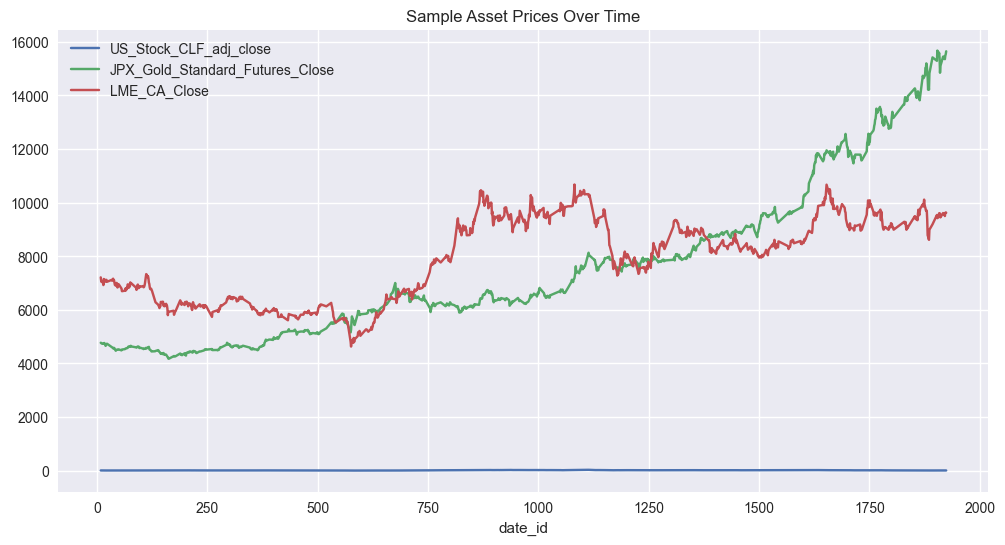

In [121]:
# Set date_id as index for plotting
df_plot = df_merged.set_index("date_id")

# Plot a few representative assets
sample_cols = ["US_Stock_CLF_adj_close", "JPX_Gold_Standard_Futures_Close", "LME_CA_Close"]
df_plot[sample_cols].plot(figsize=(12,6))
plt.title("Sample Asset Prices Over Time")
plt.show()

***Correlation Analysis***
* This will identify relationships between assets


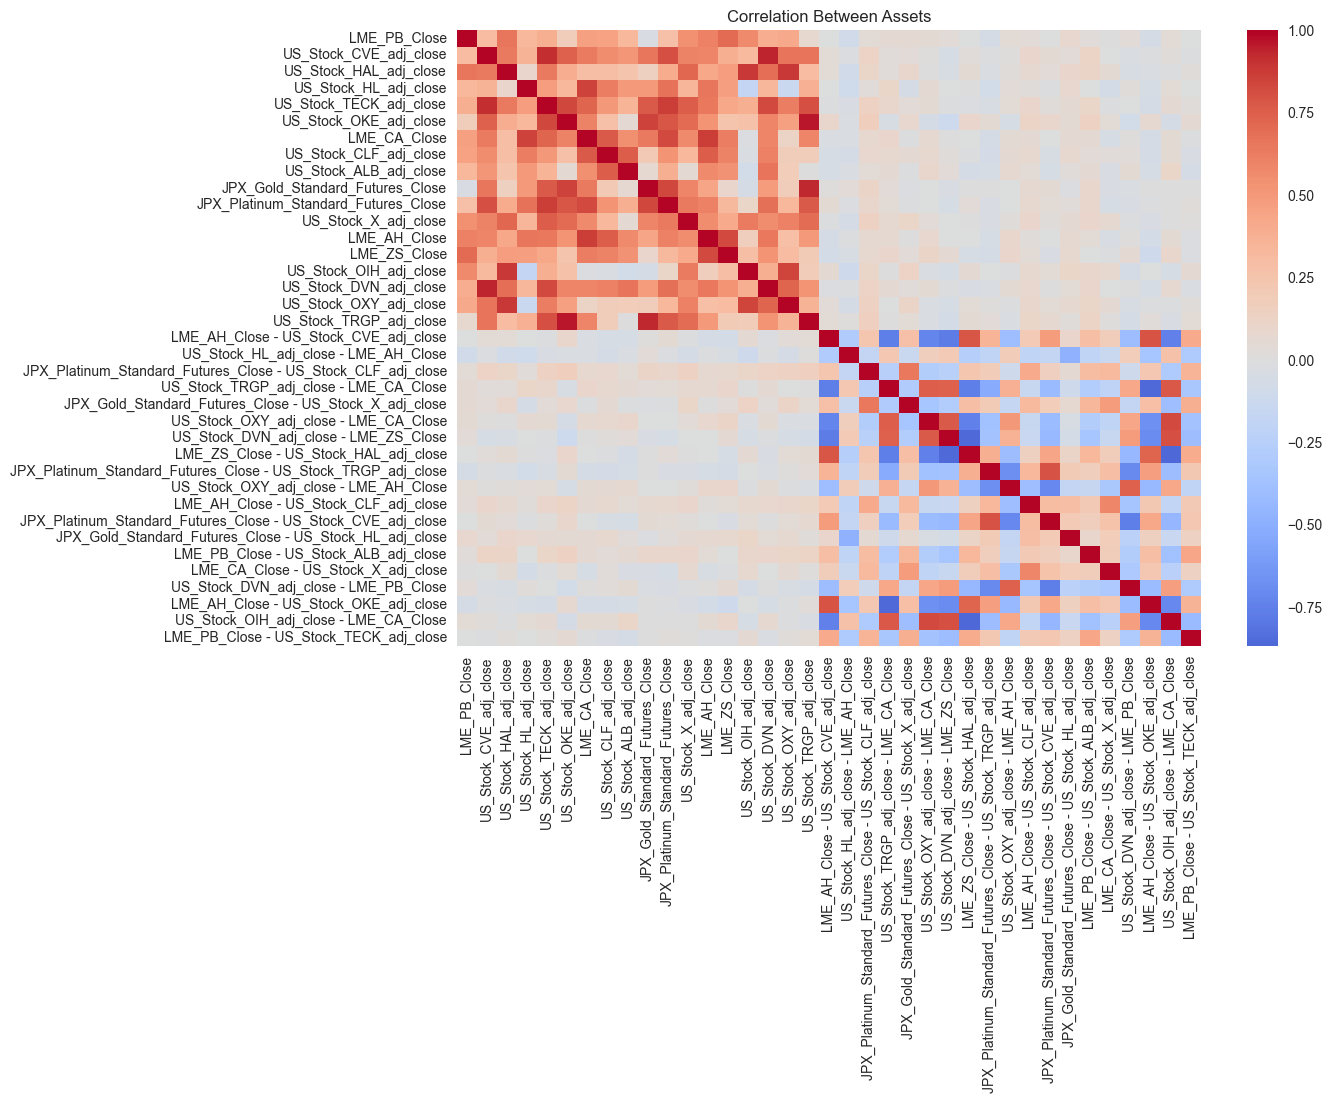

In [122]:
corr = df_merged.drop(columns="date_id").corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Between Assets")
plt.show()

***Ajusting the Code for better Visualization***

* Makes the plot larger.

* Rotates x-axis labels 90° so they don’t overlap.

* Smaller font size for labels.

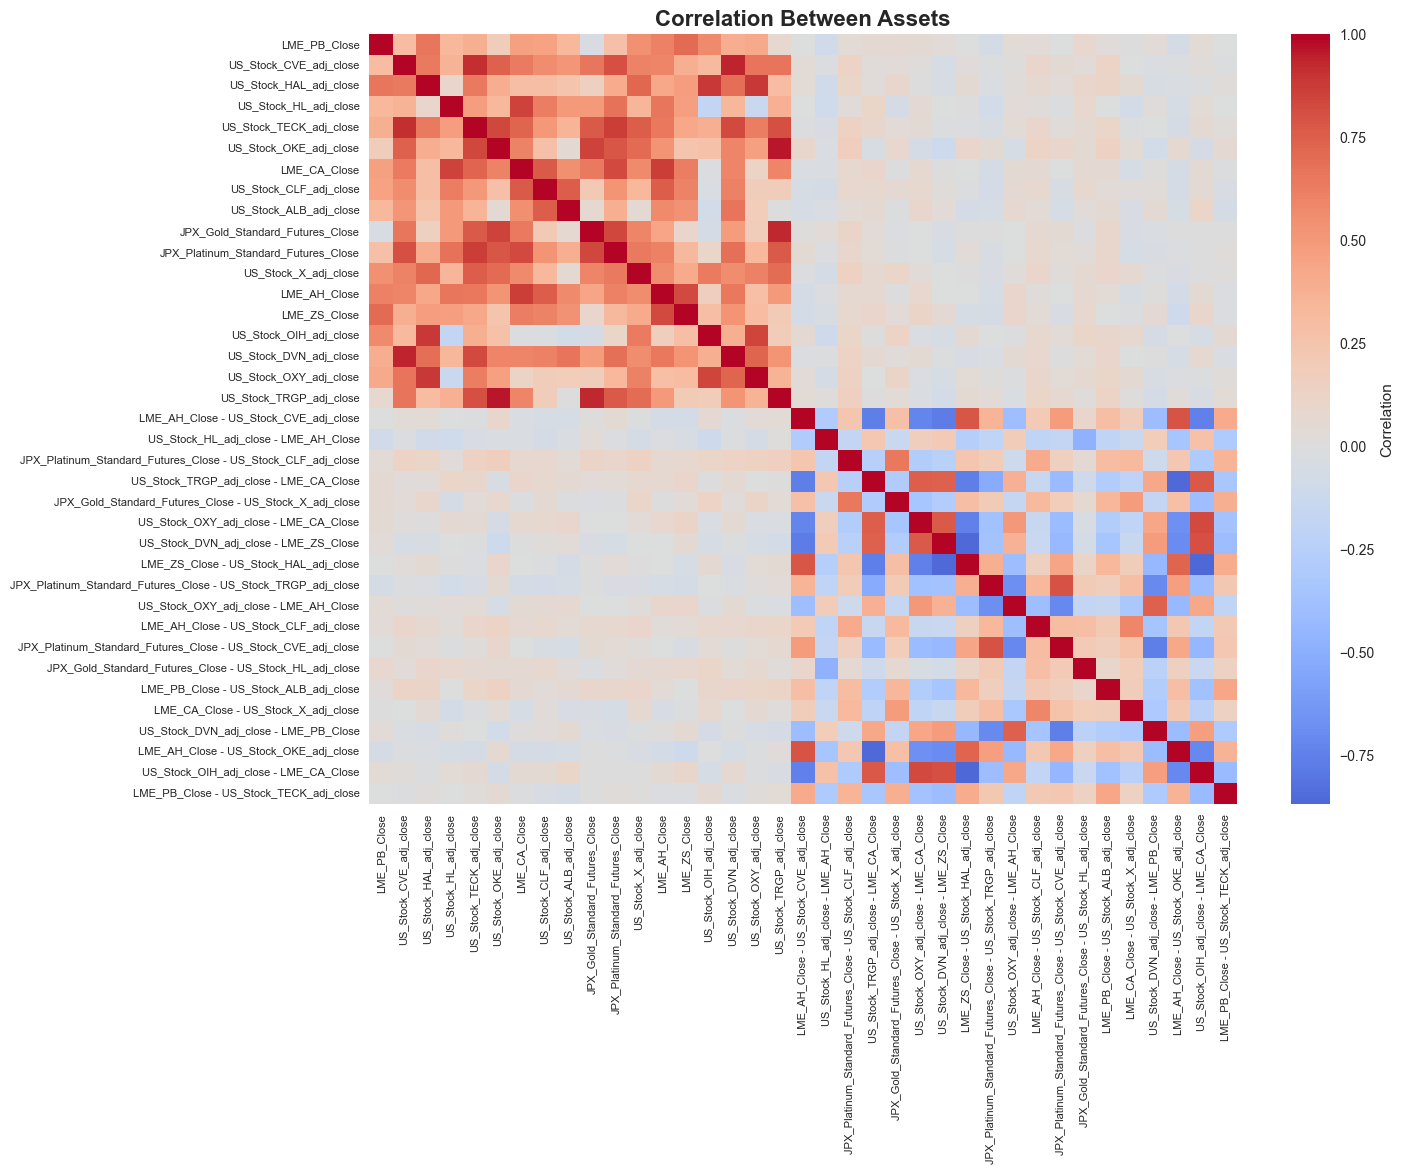

In [123]:
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False, 
            cbar_kws={'label': 'Correlation'})
plt.title("Correlation Between Assets", fontsize=16, fontweight="bold")
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.show()

### Insights from Correlation

- **High Intra-Asset Class Correlation**
  - Assets within the same category (e.g., U.S. stocks, LME metals) are very positively correlated.
  - Adding more assets within the same category does not significantly reduce portfolio risk.

- **Limited Diversification within Asset Classes**
  - High correlation means that when one asset in the group performs poorly, others are also more likely to do the same.

- **Diversification Potential between Asset Classes**
  - Incorporating assets from different classes (e.g., equities vs. metals) diversifies more.
  - Asset class correlations are low or moderate.

- **Very Few Negative Correlations**
  - There are almost no strong negative correlations.
  - This lowers the possibility of effective hedging against downturns.
  
- **Visual Validation of Financial Concepts**
    - The heatmap confirms Modern Portfolio Theory:
    - To reduce risk and achieve stability, mix assets with **low or negative correlations**.

***Clustered Heatmap***
* Groups highly correlated assets together
* It adds a dendodram to show relationships

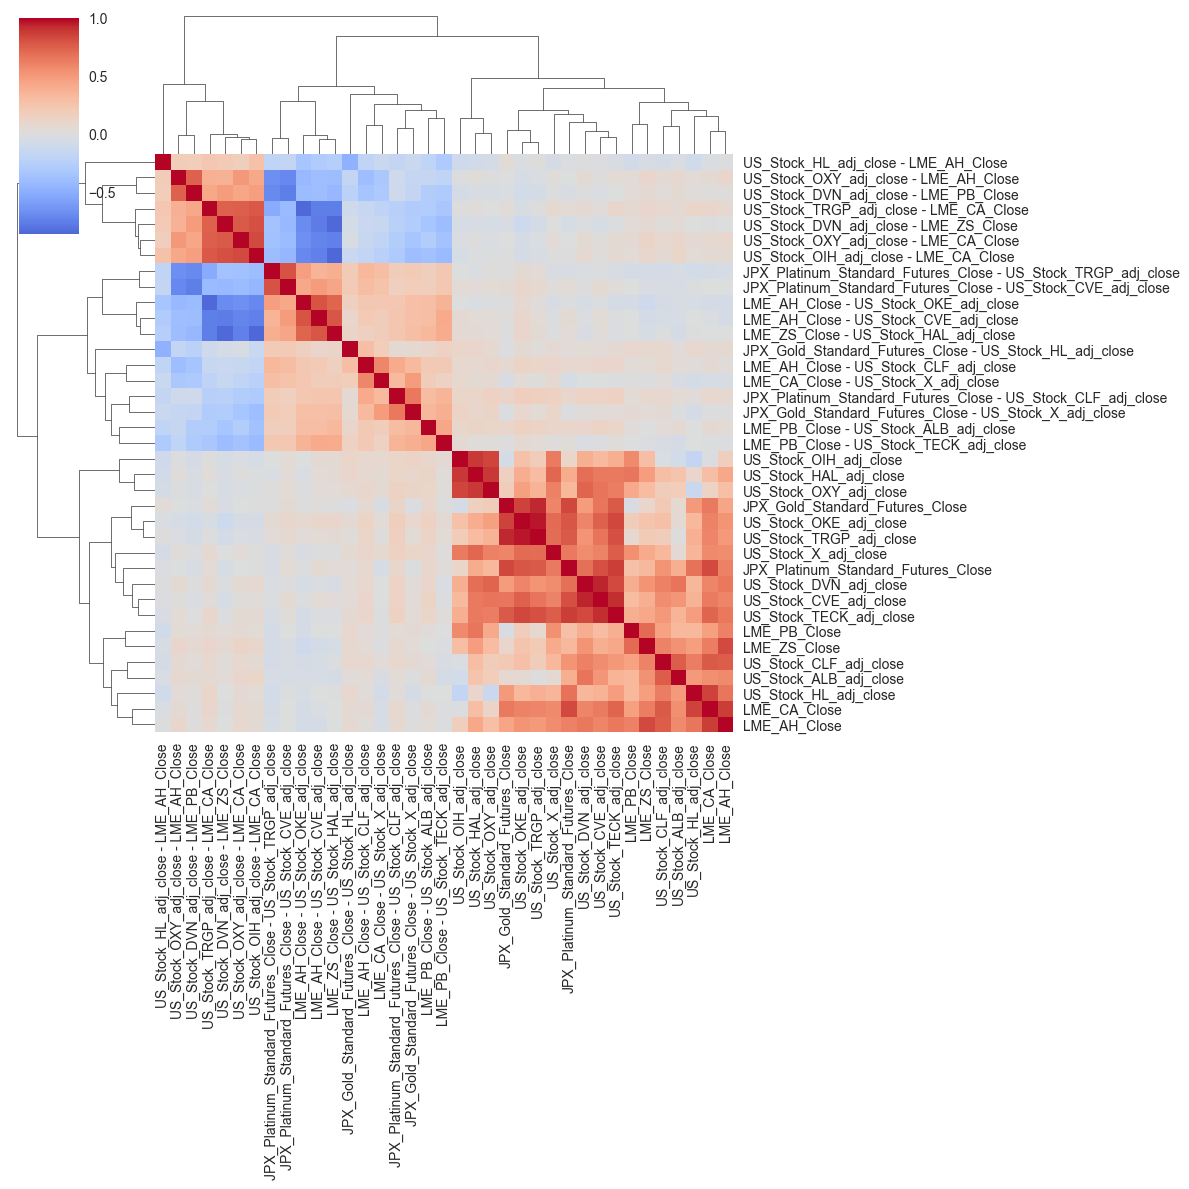

In [124]:
sns.clustermap(corr, cmap="coolwarm", center=0, figsize=(12,12))

### Findings

- **Asset Class Correlations**
  - Correlation between the same class (e.g., US equities, LME metals) is positive.
  - Caused by shared economic/market determinants.

- **Diversification Opportunities**
  - Lower correlation between opposing classes (e.g., US equities and LME, JPX Gold and LME).
  - Low/negative correlations enable risk reduction in the portfolio.

- **Hierarchical Clustering**
  - Confirms grouping: US stocks belong to one cluster, LME metals constitute another cluster.
  - Helps determine different assets to diversify better.


### ***Time Series Decomposition***
* To split series into trends,seasonality and residuals
* It will also help to determine whether the patterns are deterministic or random


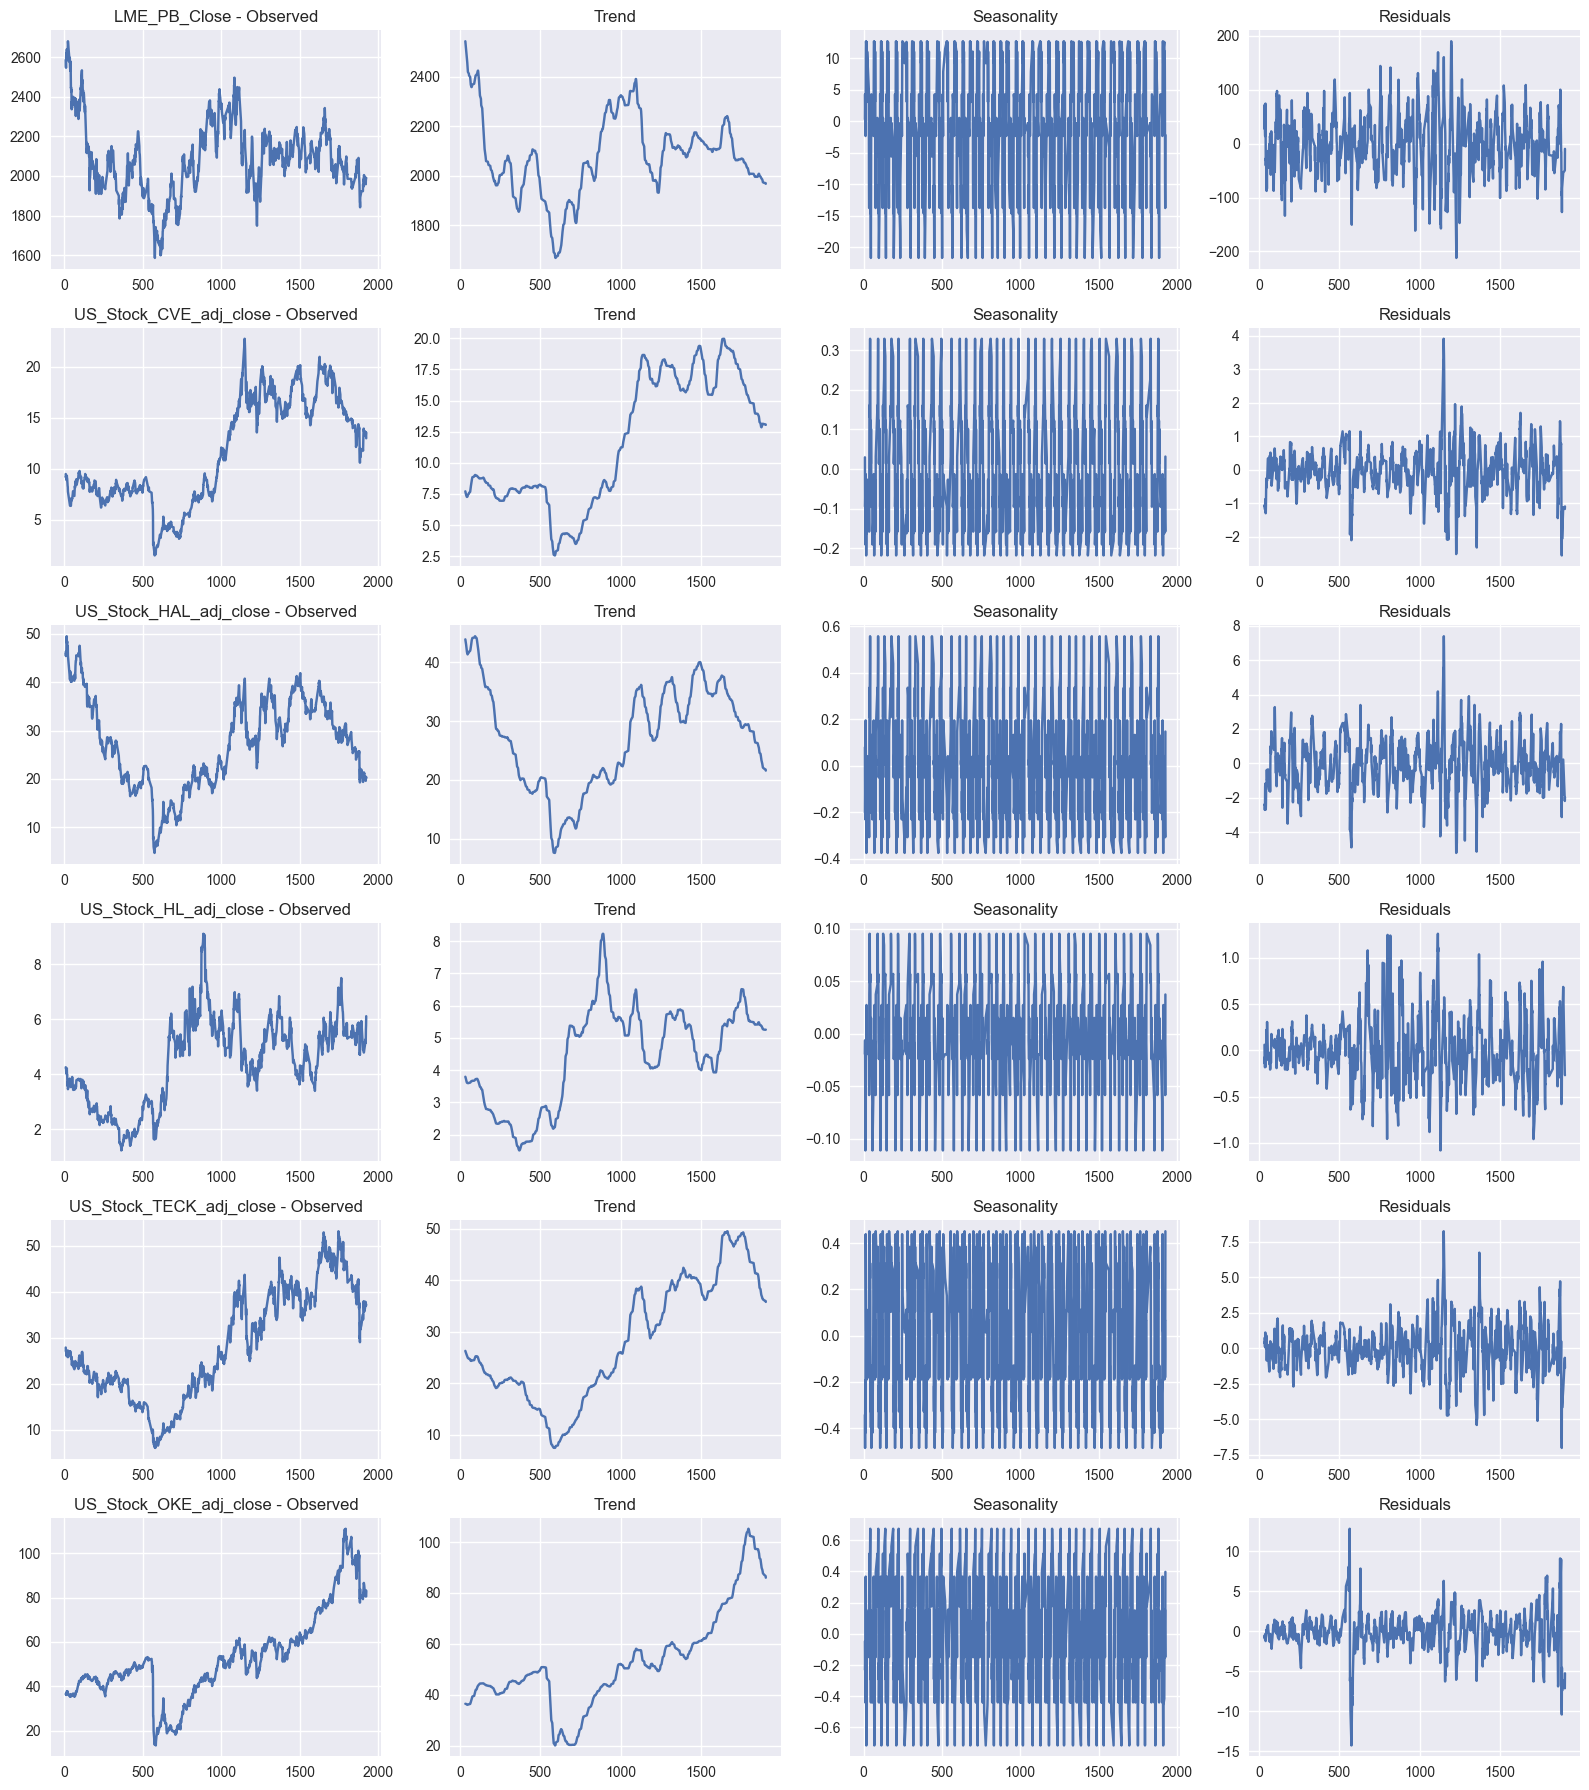

In [125]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

assets = df_plot.columns[:6]   # choose first 6 assets to display in one grid
period = 30

fig, axes = plt.subplots(len(assets), 4, figsize=(16, 3*len(assets)))

for i, col in enumerate(assets):
    try:
        result = seasonal_decompose(df_plot[col].dropna(), model="additive", period=period)
        
        axes[i,0].plot(result.observed); axes[i,0].set_title(f"{col} - Observed")
        axes[i,1].plot(result.trend);    axes[i,1].set_title("Trend")
        axes[i,2].plot(result.seasonal); axes[i,2].set_title("Seasonality")
        axes[i,3].plot(result.resid);    axes[i,3].set_title("Residuals")
        
    except Exception as e:
        print(f"Skipping {col}: {e}")

plt.tight_layout()
plt.show()

**Key Inferences on decomposition**

 **US_Stock_CLF:** 
 * Shows long term upward trend, a sharp decline and an upward recovery
 * Regular wave pattern in all seasons
 * Residuals appear to be random noise meaning the decomposition effectively captured the patterns.

**JPX_Gold_Standard_Futures:**
 * Strong and consintent upward trend
 * Residuals centred around zero to mean trend and seasonality captured the majority of the variance in the data
 * Cyclical pattern with large amplitude

**US_Stock_OKE:**
 * Distinct long-term upward trend and volatile
 * The residuals are relatively small and centered around zero, suggesting the model is a good fit.
 * 

**LME_CA_Close:**
 * The copper price shows a general upward trend but with more fluctuations,a distinct peak then followed by a decline
 * Seasonality shows a strong and consistent wave pattern
 * The residuals are large in magnitudes which could imply that there are other factors or sudden shocks that the trend and seasonality models don't fully explain.

**US_Stock_HAL:**
 * Fair flat or slightly upward trend
 * Repeating wave like pattern 
 * The residuals are noisy and have a relatively large variance
**US_Stock_HL:**
 * cyclical trend, moving up and down over the observed period
 * Small and consistent wave pattern
 * Random fluctuations in the residuals but in small magnitudes (It captured the overall behaviour)

### ***Stationarity Tests (ADF & KPSS)***

**Why it is important:**
 * Time series models like ARIMA( AutoRegressive Integrated Moving Average) assumes stationarity
 * **ADF test** checks if the series has a unit root (non-stationary)
 * **KPSS test** does the opposite (null = stationary) therefore using both give robust diagnosis


In [126]:
def test_stationarity_all(df, max_assets=None):
    """
    Run ADF and KPSS stationarity tests for all time series in df.
    
    Parameters:
        df (pd.DataFrame): DataFrame with time series (columns = assets).
        max_assets (int): Limit number of assets to test (optional).
    
    Returns:
        pd.DataFrame: Summary of results for each asset.
    """
    results = []
    cols = df.columns[:max_assets] if max_assets else df.columns
    
    for col in cols:
        series = df[col].dropna()
        if series.empty:
            continue
        
        # ADF test
        try:
            adf_stat, adf_p, _, _, _, _ = adfuller(series)
            adf_conclusion = "Stationary " if adf_p < 0.05 else "Non-Stationary "
        except Exception as e:
            adf_stat, adf_p, adf_conclusion = None, None, f"Error: {e}"
        
        # KPSS test
        try:
            kpss_stat, kpss_p, _, _ = kpss(series, regression="c", nlags="auto")
            kpss_conclusion = "Stationary " if kpss_p >= 0.05 else "Non-Stationary "
        except Exception as e:
            kpss_stat, kpss_p, kpss_conclusion = None, None, f"Error: {e}"
        
        # Final verdict
        if adf_conclusion == "Stationary " and kpss_conclusion == "Stationary ":
            final = " Stationary"
        else:
            final = " Non-Stationary"
        
        results.append({
            "Asset": col,
            "ADF Statistic": adf_stat,
            "ADF p-value": adf_p,
            "ADF Conclusion": adf_conclusion,
            "KPSS Statistic": kpss_stat,
            "KPSS p-value": kpss_p,
            "KPSS Conclusion": kpss_conclusion,
            "Final Verdict": final
        })
    
    return pd.DataFrame(results)

stationarity_results = test_stationarity_all(df_merged)
stationarity_results

Asset  ADF Statistic  \
0                                             date_id       0.774235   
1                                        LME_PB_Close      -3.241199   
2                              US_Stock_CVE_adj_close      -1.429772   
3                              US_Stock_HAL_adj_close      -2.207669   
4                               US_Stock_HL_adj_close      -2.035183   
5                             US_Stock_TECK_adj_close      -1.406401   
6                              US_Stock_OKE_adj_close      -1.087993   
7                                        LME_CA_Close      -1.283286   
8                              US_Stock_CLF_adj_close      -1.957581   
9                              US_Stock_ALB_adj_close      -1.245109   
10                    JPX_Gold_Standard_Futures_Close       3.134870   
11                JPX_Platinum_Standard_Futures_Close      -1.345484   
12                               US_Stock_X_adj_close      -1.054288   
13                                       LME_AH_Close      -1.785521   
14                                       LME_ZS_Close      -2.631161   
15                             US_Stock_OIH_adj_close      -2.526847   
16                             US_Stock_DVN_adj_close      -1.198120   
17                             US_Stock_OXY_adj_close      -1.521485   
18                            US_Stock_TRGP_adj_close       0.722744   
19              LME_AH_Close - US_Stock_CVE_adj_close     -10.156671   
20               US_Stock_HL_adj_close - LME_AH_Close     -11.434542   
21  JPX_Platinum_Standard_Futures_Close - US_Stock...     -11.625174   
22             US_Stock_TRGP_adj_close - LME_CA_Close      -9.114583   
23  JPX_Gold_Standard_Futures_Close - US_Stock_X_a...     -11.300052   
24              US_Stock_OXY_adj_close - LME_CA_Close      -9.542320   
25              US_Stock_DVN_adj_close - LME_ZS_Close     -10.054140   
26              LME_ZS_Close - US_Stock_HAL_adj_close      -8.081473   
27  JPX_Platinum_Standard_Futures_Close - US_Stock...      -8.811859   
28              US_Stock_OXY_adj_close - LME_AH_Close      -9.972026   
29              LME_AH_Close - US_Stock_CLF_adj_close     -11.844016   
30  JPX_Platinum_Standard_Futures_Close - US_Stock...     -10.537979   
31  JPX_Gold_Standard_Futures_Close - US_Stock_HL_...     -11.099225   
32              LME_PB_Close - US_Stock_ALB_adj_close     -10.815197   
33                LME_CA_Close - US_Stock_X_adj_close     -11.085603   
34              US_Stock_DVN_adj_close - LME_PB_Close      -9.595196   
35              LME_AH_Close - US_Stock_OKE_adj_close      -8.133266   
36              US_Stock_OIH_adj_close - LME_CA_Close      -8.884120   
37             LME_PB_Close - US_Stock_TECK_adj_close      -9.374528   

     ADF p-value   ADF Conclusion  KPSS Statistic  KPSS p-value  \
0   9.912087e-01  Non-Stationary         5.470499      0.010000   
1   1.772038e-02      Stationary         0.367553      0.091141   
2   5.679229e-01  Non-Stationary         3.864727      0.010000   
3   2.034738e-01  Non-Stationary         0.974912      0.010000   
4   2.713627e-01  Non-Stationary         2.377625      0.010000   
5   5.792035e-01  Non-Stationary         4.040059      0.010000   
6   7.198362e-01  Non-Stationary         3.583721      0.010000   
7   6.367840e-01  Non-Stationary         3.421097      0.010000   
8   3.054761e-01  Non-Stationary         1.992827      0.010000   
9   6.538963e-01  Non-Stationary         1.749511      0.010000   
10  1.000000e+00  Non-Stationary         4.732241      0.010000   
11  6.081152e-01  Non-Stationary         4.577995      0.010000   
12  7.329532e-01  Non-Stationary         2.149175      0.010000   
13  3.876735e-01  Non-Stationary         2.011799      0.010000   
14  8.672632e-02  Non-Stationary         0.588446      0.023687   
15  1.090780e-01  Non-Stationary         1.023660      0.010000   
16  6.744039e-01  Non-Stationary         2.894067      0.010000   
17  5.228577e-01  Non-Stationary 

***Key Inferences***
 * There is consistency in both ADF(Augmented Dickey–Fuller Test) and KPSS(Kwiatkowski–Phillips–Schmidt–Shin Test)
 * **ADF checks** for unit root
 * **KPSS** checks for trend stationarity
 * Transformation shoud be performed by either:
   * Applying first differencing
   * compute log returns
   * Detrending-Remoning trend or seasonality

In [127]:
def run_stationarity_tests(series):
    """Helper to run ADF and KPSS on one series."""
    results = {}
    series = series.dropna()

    # ADF test
    try:
        adf_stat, adf_p, _, _, _, _ = adfuller(series)
        results["ADF Statistic"] = adf_stat
        results["ADF p-value"] = adf_p
        results["ADF Conclusion"] = "Stationary ✅" if adf_p < 0.05 else "Non-Stationary ❌"
    except Exception as e:
        results["ADF Statistic"], results["ADF p-value"], results["ADF Conclusion"] = None, None, f"Error: {e}"

    # KPSS test
    try:
        kpss_stat, kpss_p, _, _ = kpss(series, regression="c", nlags="auto")
        results["KPSS Statistic"] = kpss_stat
        results["KPSS p-value"] = kpss_p
        results["KPSS Conclusion"] = "Stationary ✅" if kpss_p >= 0.05 else "Non-Stationary ❌"
    except Exception as e:
        results["KPSS Statistic"], results["KPSS p-value"], results["KPSS Conclusion"] = None, None, f"Error: {e}"

    # Final Verdict
    if results["ADF Conclusion"] == "Stationary ✅" and results["KPSS Conclusion"] == "Stationary ✅":
        results["Final Verdict"] = "✅ Stationary"
    else:
        results["Final Verdict"] = "❌ Non-Stationary"

    return results


def stationarity_all_versions(df, max_assets=None):
    """
    Run stationarity tests on raw, differenced, and log-return versions of all assets.
    """
    results = []
    cols = df.columns[:max_assets] if max_assets else df.columns

    for col in cols:
        if col.lower().startswith("date"):  # skip date column
            continue
        series = df[col].dropna()

        # Skip non-numeric columns
        if not np.issubdtype(series.dtype, np.number):
            continue

        #  Raw series
        raw_res = run_stationarity_tests(series)

        #  First difference
        diff_res = run_stationarity_tests(series.diff())

        # Log returns
        log_ret = np.log(series / series.shift(1))
        log_res = run_stationarity_tests(log_ret)

        results.append({
            "Asset": col,
            "Raw Verdict": raw_res["Final Verdict"],
            "Diff Verdict": diff_res["Final Verdict"],
            "Log Return Verdict": log_res["Final Verdict"]
        })

    return pd.DataFrame(results)


# Example usage
stationarity_comparison = stationarity_all_versions(df_merged, max_assets=15)
stationarity_comparison

Asset       Raw Verdict      Diff Verdict  \
0                          LME_PB_Close      ✅ Stationary      ✅ Stationary   
1                US_Stock_CVE_adj_close  ❌ Non-Stationary      ✅ Stationary   
2                US_Stock_HAL_adj_close  ❌ Non-Stationary      ✅ Stationary   
3                 US_Stock_HL_adj_close  ❌ Non-Stationary      ✅ Stationary   
4               US_Stock_TECK_adj_close  ❌ Non-Stationary      ✅ Stationary   
5                US_Stock_OKE_adj_close  ❌ Non-Stationary      ✅ Stationary   
6                          LME_CA_Close  ❌ Non-Stationary      ✅ Stationary   
7                US_Stock_CLF_adj_close  ❌ Non-Stationary      ✅ Stationary   
8                US_Stock_ALB_adj_close  ❌ Non-Stationary      ✅ Stationary   
9       JPX_Gold_Standard_Futures_Close  ❌ Non-Stationary  ❌ Non-Stationary   
10  JPX_Platinum_Standard_Futures_Close  ❌ Non-Stationary      ✅ Stationary   
11                 US_Stock_X_adj_close  ❌ Non-Stationary      ✅ Stationary   
12                         LME_AH_Close  ❌ Non-Stationary      ✅ Stationary   
13                         LME_ZS_Close  ❌ Non-Stationary      ✅ Stationary   

   Log Return Verdict  
0        ✅ Stationary  
1        ✅ Stationary  
2        ✅ Stationary  
3        ✅ Stationary  
4        ✅ Stationary  
5        ✅ Stationary  
6        ✅ Stationary  
7        ✅ Stationary  
8        ✅ Stationary  
9        ✅ Stationary  
10       ✅ Stationary  
11       ✅ Stationary  
12       ✅ Stationary  
13       ✅ Stationary

### Stationarity Test Summary

From the table above, we observe the following patterns:

1. **Raw Data (Price Levels)**  
   - All assets appear as Non-Stationary.  
   - This is expected because financial and commodity prices usually contain trends, unit roots, and changing variance.  

2. **Differenced Data**  
   - Most assets became Stationary after applying first-order differencing.  
   - This confirms that differencing effectively removed trends and unit roots.  
   - Exception: *JPX Gold Standard Futures* remained Non-Stationary, suggesting it may need either:  
     - Higher-order differencing, or  
     - Explicit handling of **seasonality**.  

3. **Log Returns**  
   - Almost all series turned Stationary.  
   - Log transformation helps stabilize **variance**, making it a preferred approach in financial time series.  

- **Raw prices are not suitable** for modeling directly because they are non-stationary.  
- **Log returns and differencing** are effective transformations to achieve stationarity, which is a **critical assumption** for ARIMA, VAR, and most statistical forecasting models.  

##### **FEATURE ENGINEERING**
This is the process of transforming raw data into powerful inputs.

Time series feature engineering will include:
 * Standardization- We will use log returns because it achieved 100% stationerity
 * Rolling averages-
 * Volatility measures (rolling standard deviation)-capture local trend & volatility
 * Lag features-capture autocorrelation
 * Seasonality indicators-EWMA captures recent trends

**Since most assets became stationery after transformation, we’ll use log_returns as the base input for feature engineering.**

In [128]:
log_returns = np.log(df_merged / df_merged.shift(1)).replace([np.inf, -np.inf], np.nan)
log_returns = log_returns.dropna(how="all")
log_returns

date_id  LME_PB_Close  US_Stock_CVE_adj_close  US_Stock_HAL_adj_close  \
1     0.105361     -0.012838               -0.036400               -0.019191   
2     0.095310     -0.002745                0.013218                0.013717   
3     0.087011      0.024434               -0.014172               -0.009314   
4     0.080043     -0.011173               -0.026031                0.012337   
5     0.074108      0.014997                0.014543                0.061990   
...        ...           ...                     ...                     ...   
1124  0.000521     -0.009885                0.010386                0.011017   
1125  0.000521     -0.002550               -0.027686               -0.024705   
1126  0.000520      0.011678                0.015061                0.021213   
1127  0.000520      0.002017                0.014100                0.020772   
1128  0.000520      0.002767               -0.044452               -0.012416   

      US_Stock_HL_adj_close  US_Stock_TECK_adj_close  US_Stock_OKE_adj_close  \
1                 -0.011423                -0.028471                0.002214   
2                  0.000000                 0.003016                0.010319   
3                 -0.042145                -0.021315               -0.021608   
4                  0.018948                 0.006478                0.003092   
5                 -0.004710                -0.010935                0.026397   
...                     ...                      ...                     ...   
1124              -0.019194                 0.007459                0.001116   
1125              -0.003884                -0.016861                0.001981   
1126               0.091056                -0.002432                0.020448   
1127               0.024563                 0.002702                0.008809   
1128               0.057255                 0.005650               -0.033222   

      LME_CA_Close  US_Stock_CLF_adj_close  US_Stock_ALB_adj_close  \
1        -0.018478               -0.058105               -0.042221   
2        -0.006236                0.035976               -0.008237   
3         0.005953               -0.009473               -0.073872   
4        -0.004959                0.009473               -0.016246   
5         0.003827               -0.011849               -0.021609   
...            ...                     ...                     ...   
1124      0.000314               -0.006757               -0.009694   
1125     -0.007343               -0.011935               -0.030554   
1126      0.012399                0.208282               -0.012089   
1127      0.001818                0.051572                0.034258   
1128     -0.001298               -0.002649                0.046105   

      JPX_Gold_Standard_Futures_Close  JPX_Platinum_Standard_Futures_Close  \
1                           -0.001258                            -0.003388   
2                           -0.005049                             0.001131   
3                           -0.000422                             0.004228   
4                           -0.000633                             0.002528   
5                           -0.000422                             0.010883   
...                               ...                                  ...   
1124                        -0.001296                             0.017670   
1125                        -0.004485                            -0.010691   
1126                         0.008627                            -0.020224   
1127                         0.003610                             0.006431   
1128                         0.006671                             0.017580   

      US_Stock_X_adj_close  LME_AH_Close  LME_ZS_Close  \
1                -0.012081     -0.017211     -0.005419   
2                 0.016414      0.001370     -0.010927   
3                -0.007148      0.022108      0.002521   
4                -0.006684     -0.009415      0.011925   
5                

***Buidling features log_returns***

This will involve lags, rolling statistics, volatility, and momentum indicators which will help:

 * Capture dynamics that drive forecasting and classification( Volatility and momentum)
 * With model interpretability for instance:
   * Positive -lag means yesterday’s return was positive.
   * High rolling volatility means the asset is riskier right now.
   * Negative slope means the market is trending down.
 * To form a foundation for Advanced Models
 * Capture autocorrelation (Lags)
 * Capture trends/seasonality(Rolling statistics)


In [129]:
def build_ts_features(returns_df, lags=[1,2,3], windows=[5,21,63], ewma_spans=[12,26], slope_windows=[21]):
    X = pd.DataFrame(index=returns_df.index)
    
    for col in returns_df.columns:
        s = returns_df[col]
        
        # Lags
        for lag in lags:
            X[f"{col}_lag{lag}"] = s.shift(lag)
        
        # Rolling mean & std
        for w in windows:
            X[f"{col}_rmean{w}"] = s.rolling(w).mean()
            X[f"{col}_rstd{w}"]  = s.rolling(w).std()
        
        # EWMA (trend capture)
        for span in ewma_spans:
            X[f"{col}_ewma{span}"] = s.ewm(span=span, adjust=False).mean()
        
        # Rolling slope (linear trend)
        for w in slope_windows:
            X[f"{col}_slope{w}"] = s.rolling(w).apply(
                lambda x: np.polyfit(np.arange(len(x)), x, 1)[0] if x.notna().all() else np.nan,
                raw=False
            )
    
    return X

features = build_ts_features(log_returns)
features = features.dropna(how="all")   # drop rows with too many NaNs

In [130]:
# Checking general information of the features
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1128 entries, 1 to 1128
Columns: 456 entries, date_id_lag1 to LME_PB_Close - US_Stock_TECK_adj_close_slope21
dtypes: float64(456)
memory usage: 3.9 MB


### ***Cleaning the features and scaling***

Why Clean the data?
* To allow for smooth modeling
* For consistency, duplicates or wrong data types can mislead the the model.
* For better generalization.

Why Scale?
* To ensure fair treatment of features by avoiding dorminance
* To improve Speed iin training
* To Improve performance

In [131]:
features.isnull().values.any()

True

In [132]:
# Check for missing values
print("Missing values per column (before filling):")
print(features.isnull().sum())
print("\nTotal missing values:", features.isnull().sum().sum())

Missing values per column (before filling):
date_id_lag1                                         1
date_id_lag2                                         2
date_id_lag3                                         3
date_id_rmean5                                       4
date_id_rstd5                                        4
                                                  ... 
LME_PB_Close - US_Stock_TECK_adj_close_rmean63    1128
LME_PB_Close - US_Stock_TECK_adj_close_rstd63     1128
LME_PB_Close - US_Stock_TECK_adj_close_ewma12        0
LME_PB_Close - US_Stock_TECK_adj_close_ewma26        0
LME_PB_Close - US_Stock_TECK_adj_close_slope21    1128
Length: 456, dtype: int64

Total missing values: 163211


In [133]:
# Filling in the missing values
features = features.fillna(method="ffill").fillna(method="bfill").fillna(0)
from sklearn.preprocessing import StandardScaler
# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

***PCA( Principal Component Analysis)***


**Why PCA**
1. **Reduces Dimensionality**  
   - High-dimensional datasets (like multiple financial assets ) can be difficult to analyze.  
   - PCA simplifies them while retaining most of the information.  

2. **Removes Noise & Multicollinearity**  
   - Many time series assets are highly correlated.
   - PCA extracts independent components, reducing redundancy.  

3. **Improves Model Efficiency**  
   - With fewer features, machine learning models train faster and may generalize better.  

4. **Helps in Visualization**  
   - PCA projects complex data into 2D or 3D space, making patterns and clusters easier to see.  

5. **Feature Extraction**
   - PCA creates new, informative features (principal components) that may highlight hidden structure in financial time series.


In [134]:
from sklearn.decomposition import PCA

# Keep enough components to explain 90% variance
pca = PCA(n_components=0.90, svd_solver='full')
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, index=features.index, 
                      columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

print("PCA shape:", df_pca.shape)

PCA shape: (1128, 119)


In [135]:
import joblib

features.to_csv("engineered_features.csv")
df_pca.to_csv("pca_features.csv")


#### SUMMARY

Standardized outputs through log returns

Engineered features by (lags, rolling statistics, volatility, momentum).

PCA-reduced dataset (df_pca) ready for modeling/forecasting.

Data saved for future data preprocessing.